### Context: 
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
Data Description:
InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
Description: Product (item) name. Nominal. 
Quantity: The quantities of each product (item) per transaction. Numeric. 
InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 
UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
Country: Country name. Nominal, the name of the country where each customer resides.

### Problem statement
It is a business critical requirement to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value). Identifying the most valuable RFM segments can capitalize on chance relationships in the data used for this analysis.
Approach:

Following pointers will be helpful to structure your findings.   


### 1.	Perform a preliminary data inspection and Data cleaning

a.	Check for missing data and formulate apt strategy to treat them.

b.	Are there any duplicate data records? Remove them if present.

c.	Perform Descriptive analytics on the given data.

### 2.	Cohort Analysis: A cohort is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts. 

a.	Create month cohorts and analyse active  customers for each cohort.

b.	Also Analyse the retention rate of customers. Comment.

### 3.	Build a RFM model – Recency Frequency and Monetary based on their behaviour.
Recency is about when was the last order of a customer. It means the number of days since a customer made the last purchase. If it’s a case for a website or an app, this could be interpreted as the last visit day or the last login time.
Frequency is about the number of purchase in a given period. It could be 3 months, 6 months or 1 year. So we can understand this value as for how often or how many a customer used the product of a company. The bigger the value is, the more engaged the customers are. Could we say them as our VIP? Not necessary. Cause we also have to think about how much they actually paid for each purchase, which means monetary value.
Monetary is the total amount of money a customer spent in that given period. Therefore big spenders will be differentiated with other customers such as MVP or VIP.

a.	Calculate RFM metrics.

i.	Recency as the time in no. of days since last transaction

ii.	Frequency as  count of purchases done 

iii.	Monetary value  as total amount spend 

b.	Build RFM Segments.

i.	Give Recency Frequency and Monetary scores individually by dividing them in to quartiles.
Note: Rate "Recency" for customer who have been active more recently better than the less recent customer, because each company wants its customers to be recent 
Rate "Frequency" and "Monetary Value" higher label because we want Customer to spend more money and visit more often.

ii.	Combine three ratings to get a RFM segment (as strings)

iii.	Get the RFM score by adding up the three ratings.

c.	Analyse the RFM Segments by summarizing them and comment on the findings.

### 4.	Create clusters using k means clustering algorithm.

a.	Prepare the data for the algorithm.

i.	If the data is Un Symmetrically distributed, manage the skewness with appropriate transformation.

ii.	Standardize / scale the data.

b.	Decide the optimum number of clusters to be formed
c.	Analyse these clusters and comment on the results.

### 5.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

a)	Country-wise analysis to demonstrate Average spend. Use a bar chart show monthly figures.

b)	Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold.

c)	Bar graph to show the count of orders Vs. hours throughout the day. What are the peak hours per your chart?

d)	Plot the distribution of RFM values using histogram and frequency-charts.

e)	Plot error(cost) vs no of clusters selected

f)	 Visualize to compare the RFM values of the clusters using heatmap



#### Project Task: Week 1

#### Data Cleaning:

- Perform a preliminary data inspection and data cleaning.

In [1]:
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- Check for missing data and formulate an apt strategy to treat them.

In [8]:
df.isna().sum().any()

True

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
#Transactions with negative quantity (cancelled orders)

df[df['InvoiceNo'].str.startswith('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [11]:
#removing these cancelled orders entries

df = df[df['InvoiceNo'].str.startswith('C')!=True]
df.shape

(532621, 8)

In [12]:
df.InvoiceNo.nunique()

22064

In [13]:
df.StockCode.nunique()

4059

In [14]:
df.StockCode.value_counts().head(10) #top 10 stock id's that sold the most

85123A    2271
85099B    2115
22423     2022
47566     1707
20725     1595
84879     1490
22197     1426
22720     1403
21212     1370
20727     1328
Name: StockCode, dtype: int64

In [15]:
df.Quantity.describe() 

count    532621.000000
mean         10.239972
std         159.593551
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [16]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [17]:
df = df[df['Quantity']>=0]
df.shape

(531285, 8)

In [18]:
#This is a transnational data set which contains all the transactions occurring between 
#01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.
print('The minimum date is:', df.InvoiceDate.min())
print('The maximum date is:', df.InvoiceDate.max())

The minimum date is: 2010-12-01 08:26:00
The maximum date is: 2011-12-09 12:50:00


In [19]:
#checking distribution of unit price
df.UnitPrice.describe()

count    531285.000000
mean          3.857296
std          41.810047
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [20]:
df.UnitPrice.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    531285.000000
mean          3.857296
std          41.810047
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
90%           7.950000
95%           9.950000
99%          16.980000
max       13541.330000
Name: UnitPrice, dtype: float64

In [21]:
df.Country.value_counts()

United Kingdom          486286
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [22]:
df.Country.value_counts(normalize=True)

United Kingdom          0.915302
Germany                 0.017019
France                  0.015826
EIRE                    0.014858
Spain                   0.004677
Netherlands             0.004448
Belgium                 0.003823
Switzerland             0.003702
Portugal                0.002825
Australia               0.002230
Norway                  0.002018
Italy                   0.001427
Channel Islands         0.001408
Finland                 0.001289
Cyprus                  0.001156
Sweden                  0.000849
Unspecified             0.000839
Austria                 0.000749
Denmark                 0.000715
Poland                  0.000621
Japan                   0.000604
Israel                  0.000555
Hong Kong               0.000535
Singapore               0.000418
Iceland                 0.000343
USA                     0.000337
Canada                  0.000284
Greece                  0.000273
Malta                   0.000211
United Arab Emirates    0.000128
European C

In [23]:
#Valuecount of Country shows that we have values more than 90% for UK, so retailer is UK based
#So, Combining rest of the countries to one category

df['Country'] = df['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Others')
df.Country.value_counts(normalize=True)

United Kingdom    0.915302
Others            0.084698
Name: Country, dtype: float64

In [24]:
df.Description.nunique()

4077

In [132]:
df.Description.value_counts().head(15) 

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
SPOTTY BUNTING                        1014
PAPER CHAIN KIT 50'S CHRISTMAS        1003
LUNCH BAG SPACEBOY DESIGN              993
HEART OF WICKER SMALL                  979
LUNCH BAG CARS BLUE                    977
Name: Description, dtype: int64

In [26]:
df[df['Description'].str.startswith('?')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,NaN,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom
282882,561665,22171,?,142,2011-07-28 16:55:00,0.0,NaN,United Kingdom
323315,565288,23135,?,101,2011-09-02 11:43:00,0.0,NaN,United Kingdom
421093,572920,72803A,?,117,2011-10-26 16:52:00,0.0,NaN,United Kingdom


In [27]:
#as where there is ? in description there unitprice is 0 so removing these entries

df=df[df['Description'].str.startswith('?')!=True]
df.shape

(531279, 8)

In [28]:
df[df['Description'].str.startswith('*')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20749,538071,21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,NaN,United Kingdom
35675,539437,20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,NaN,United Kingdom
37095,539453,20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,NaN,United Kingdom


In [29]:
# where we have desc. starting with * in description there customer id is Nan
#replacing them with appropriate name

df['Description'] = df['Description'].replace(('*Boombox Ipod Classic','*USB Office Mirror Ball','*USB Office Mirror Ball'),('Boombox Ipod Classic','USB Office Mirror Ball','USB Office Mirror Ball'))

In [30]:
df[df['Description'].str.islower()==True]['Description'].value_counts()

check                                  39
found                                  25
adjustment                             14
amazon                                  8
had been put aside                      5
dotcom                                  4
mailout                                 3
taig adjust                             2
returned                                2
test                                    2
wrongly marked 23343                    1
michel oops                             1
wrongly coded 20713                     1
wrongly marked                          1
wrongly coded 23343                     1
damaged                                 1
amazon adjust                           1
dotcomstock                             1
dotcom adjust                           1
website fixed                           1
allocate stock for dotcom orders ta     1
found box                               1
for online retail orders                1
add stock to allocate online order

In [31]:
#removing all the above noises
df = df[df['Description'].str.islower()!=True]
df.shape

(531151, 8)

In [32]:
#Description have actual entries in uppercase words, those don't have uppercase
#they have some noises in the data set

df[df['Description'].str.istitle()==True]['Description'].value_counts()

Manual                                 328
Next Day Carriage                       79
Bank Charges                            12
Dotcomgiftshop Gift Voucher £20.00       9
Found                                    8
Dotcomgiftshop Gift Voucher £10.00       8
Dotcomgiftshop Gift Voucher £30.00       7
Amazon                                   7
Dotcomgiftshop Gift Voucher £50.00       4
Dotcomgiftshop Gift Voucher £40.00       3
High Resolution Image                    3
Adjustment                               2
Boombox Ipod Classic                     1
Dotcomgiftshop Gift Voucher £100.00      1
Amazon Adjustment                        1
John Lewis                               1
Name: Description, dtype: int64

In [33]:
#removing 
df=df[df['Description'].str.istitle()!=True]
df.shape

(530677, 8)

In [34]:
df['Description'] = df['Description'].str.strip()

In [35]:
df.CustomerID.nunique()

4335

In [36]:
#removing all entries where customer id is null
df = df[~df.CustomerID.isnull()]
df.shape

(397540, 8)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397540 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397540 non-null  object        
 1   StockCode    397540 non-null  object        
 2   Description  397540 non-null  object        
 3   Quantity     397540 non-null  int64         
 4   InvoiceDate  397540 non-null  datetime64[ns]
 5   UnitPrice    397540 non-null  float64       
 6   CustomerID   397540 non-null  float64       
 7   Country      397540 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [38]:
df.isnull().sum().any()

False

In [39]:
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
453557,575485,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,4,2011-11-09 17:03:00,3.75,18274.0,United Kingdom
444161,574721,23177,TREASURE ISLAND BOOK BOX,1,2011-11-06 14:43:00,2.25,17920.0,United Kingdom
494985,578289,23406,HOME SWEET HOME KEY HOLDER,1,2011-11-23 14:07:00,6.25,17841.0,United Kingdom


- Remove duplicate data records.

In [40]:
df.duplicated().sum().any()

True

In [41]:
df.duplicated().sum()

5187

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.duplicated().sum().any()

False

In [44]:
df.shape

(392353, 8)

- Perform descriptive analytics on the given data.

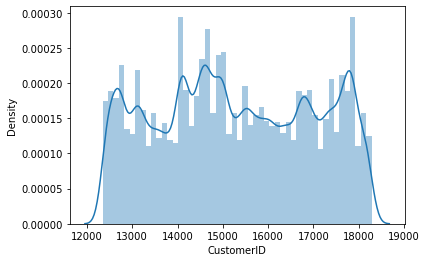

In [45]:
sns.distplot(df.CustomerID);

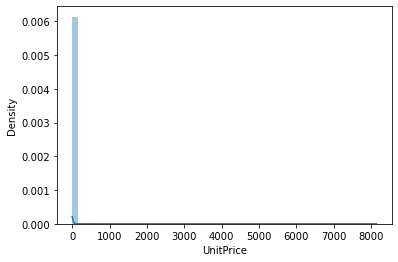

In [46]:
sns.distplot(df.UnitPrice);

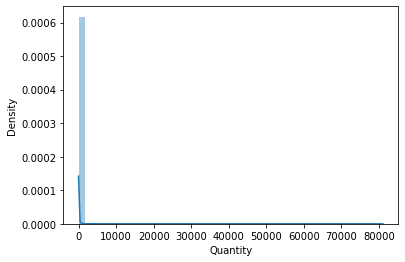

In [47]:
sns.distplot(df.Quantity);

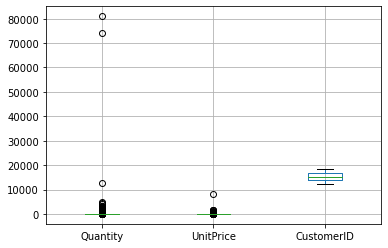

In [48]:
df.boxplot();

In [49]:
#creating cols for further exploration

df['Amount'] = df['Quantity']*df['UnitPrice']

df['Year'] = df['InvoiceDate'].dt.year

df['Month'] = df['InvoiceDate'].dt.month

df['Day'] = df['InvoiceDate'].dt.day

df['Hour'] = df['InvoiceDate'].dt.hour

df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek

In [50]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Year,Month,Day,Hour,Day_Of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


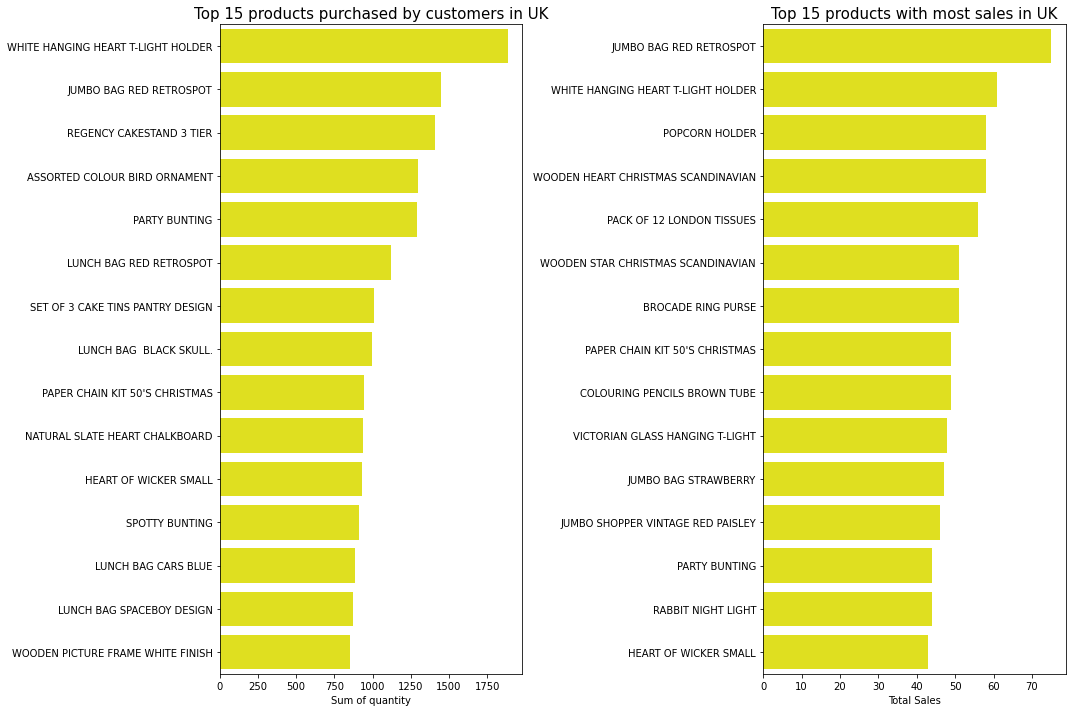

In [131]:
column = ['InvoiceNo','Amount']

plt.figure(figsize=(15,10))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(15).values,
                y = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(15).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 15 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 15 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()

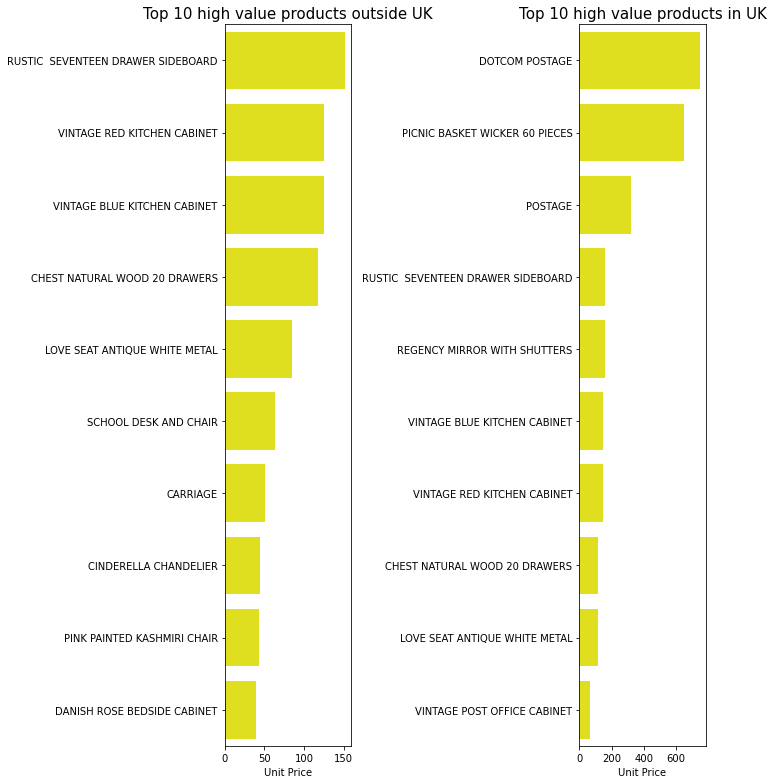

In [52]:
column = ['Others','United Kingdom']

plt.figure(figsize=(10,11))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df[df['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).values,
                y = df[df['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products outside UK',size=15)
    else:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products in UK',size=15)
        
plt.tight_layout()
plt.show()

In [53]:
df.skew()

InvoiceNo       -0.175370
Quantity       400.874873
UnitPrice      417.305256
CustomerID       0.030312
Amount         450.165574
Year            -3.517019
Month           -0.440268
Day              0.114336
Hour             0.187199
Day_Of_Week      0.399060
dtype: float64

In [54]:
df.kurtosis()

InvoiceNo          -1.198858
Quantity       171754.563034
UnitPrice      219479.429625
CustomerID         -1.180573
Amount         230220.747017
Year               10.369476
Month              -1.076601
Day                -1.171654
Hour               -0.220062
Day_Of_Week        -0.819281
dtype: float64

In [55]:
df.describe()

,Quantity,UnitPrice,CustomerID,Amount,Year,Month,Day,Hour,Day_Of_Week
count,392353.000000,392353.000000,392353.000000,392353.000000,392353.000000,392353.000000,392353.000000,392353.000000,392353.000000
mean,13.148496,2.998207,15287.636335,22.511353,2010.934638,7.601545,15.045146,12.721187,2.607387
std,181.636906,15.045821,1713.455965,310.803717,0.247164,3.415097,8.652160,2.276870,1.923926
min,1.000000,0.000000,12346.000000,0.000000,2010.000000,1.000000,1.000000,6.000000,0.000000
25%,2.000000,1.250000,13955.000000,4.950000,2011.000000,5.000000,7.000000,11.000000,1.000000
50%,6.000000,1.950000,15150.000000,12.390000,2011.000000,8.000000,15.000000,13.000000,2.000000
75%,12.000000,3.750000,16791.000000,19.800000,2011.000000,11.000000,22.000000,14.000000,4.000000
max,80995.000000,8142.750000,18287.000000,168469.600000,2011.000000,12.000000,31.000000,20.000000,6.000000


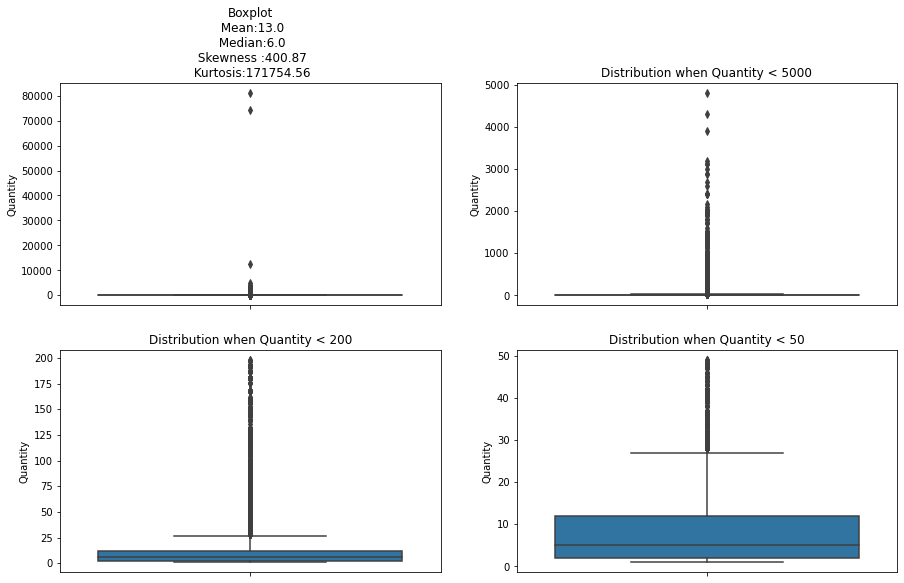

In [56]:
#distribution of Quantity

plt.figure(figsize=(15,9))

skewness = round(df.Quantity.skew(),2)
kurtosis = round(df.Quantity.kurtosis(),2)
mean = round(np.mean(df.Quantity),0)
median = np.median(df.Quantity)

plt.subplot(2,2,1)
sns.boxplot(y=df.Quantity)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness :{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y=df[df.Quantity<5000]['Quantity'])
plt.title('Distribution when Quantity < 5000')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.Quantity<200]['Quantity'])
plt.title('Distribution when Quantity < 200')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.Quantity<50]['Quantity'])
plt.title('Distribution when Quantity < 50')

plt.show()

In [57]:
#removing Quantitites > 70000

df = df[df['Quantity']<70000]

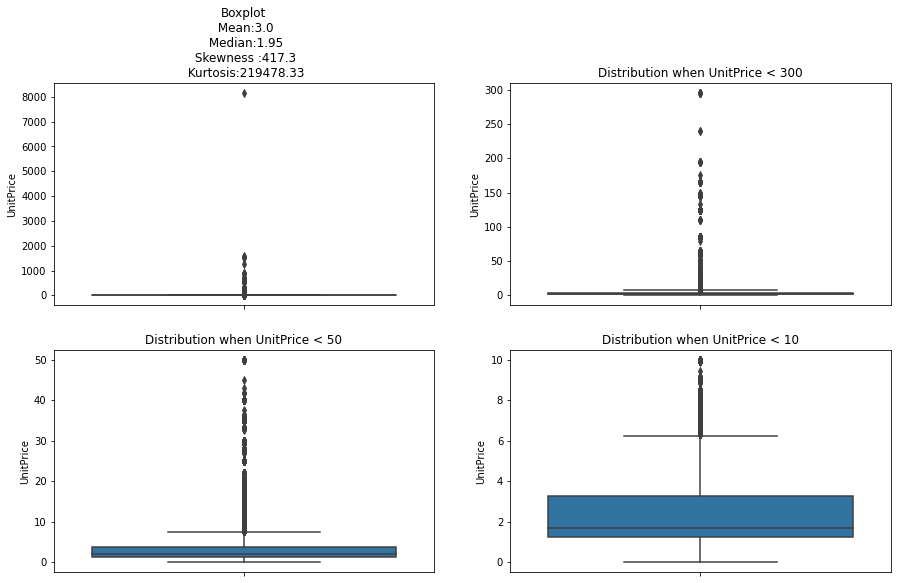

In [58]:
#distribution of UnitPrice

plt.figure(figsize=(15,9))

skewness = round(df.UnitPrice.skew(),2)
kurtosis = round(df.UnitPrice.kurtosis(),2)
mean = round(np.mean(df.UnitPrice),0)
median = np.median(df.UnitPrice)

plt.subplot(2,2,1)
sns.boxplot(y=df.UnitPrice)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness :{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y=df[df.UnitPrice<300]['UnitPrice'])
plt.title('Distribution when UnitPrice < 300')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.UnitPrice<50]['UnitPrice'])
plt.title('Distribution when UnitPrice < 50')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.UnitPrice<10]['UnitPrice'])
plt.title('Distribution when UnitPrice < 10')

plt.show()

In [59]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Year,Month,Day,Hour,Day_Of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1,8,2


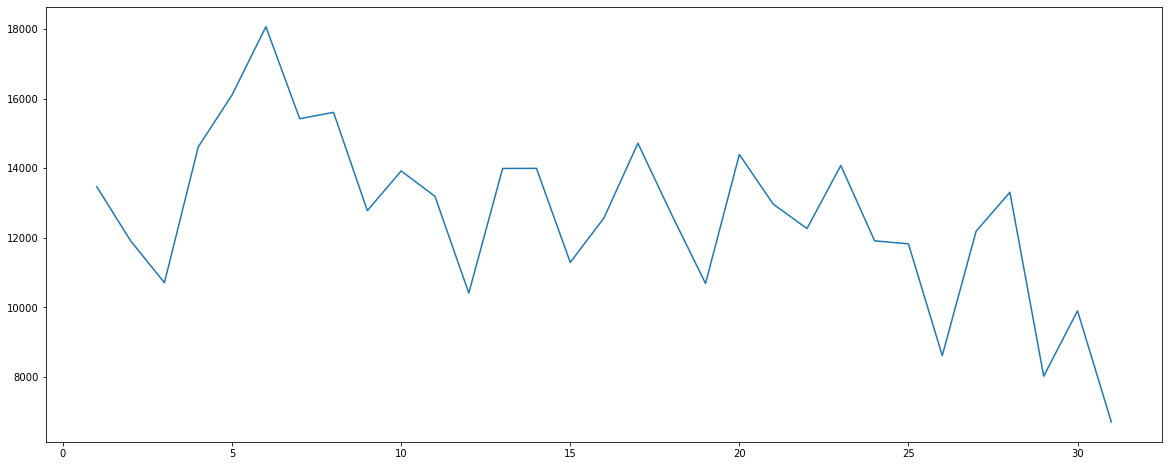

In [60]:
#time series transactions for day 
active_transactions=df.groupby('Day')['InvoiceNo'].agg(np.size)
plt.figure(figsize=(20,8))
plt.plot(active_transactions)
plt.show()

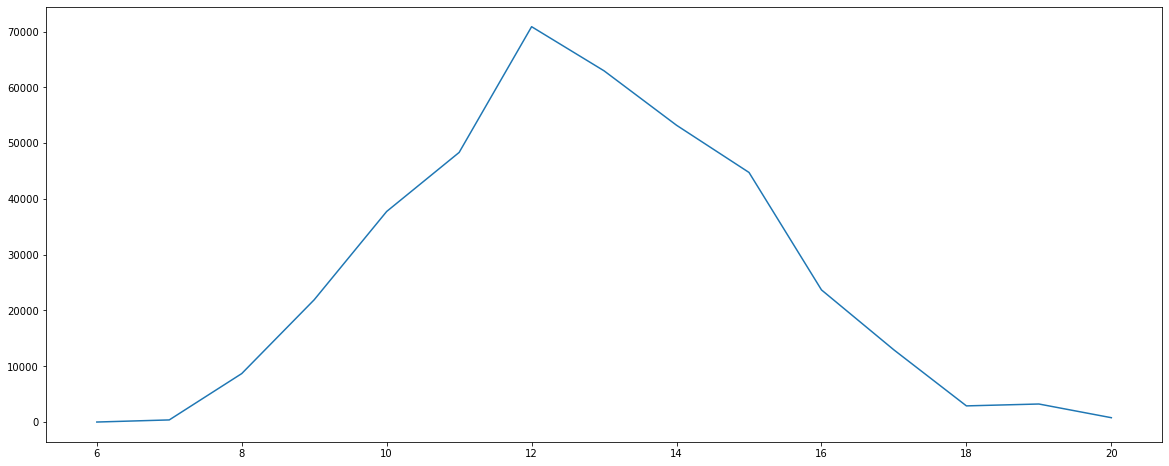

In [61]:
#time series transactions for hour 
active_transactions=df.groupby('Hour')['InvoiceNo'].agg(np.size)
plt.figure(figsize=(20,8))
plt.plot(active_transactions)
plt.show()

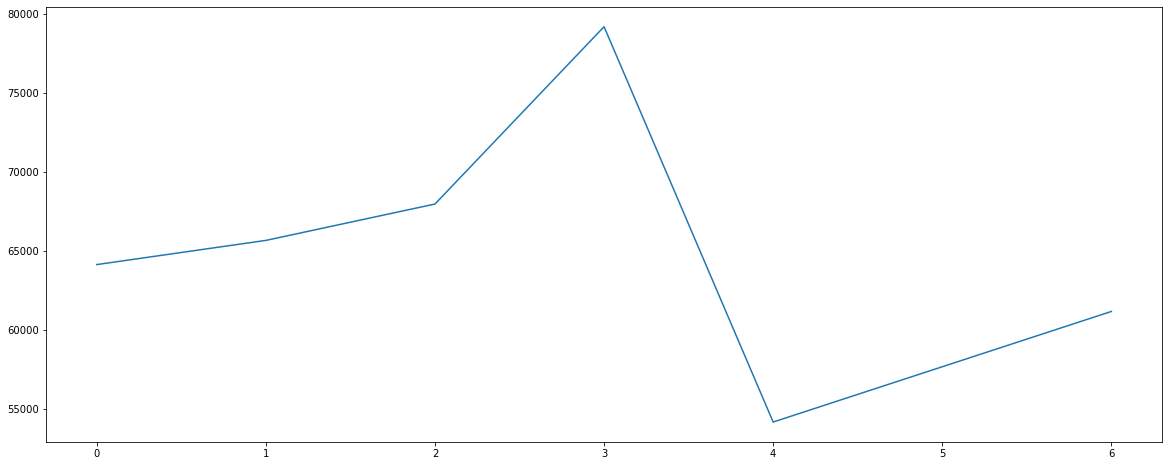

In [62]:
#time series transactions for Day_Of_Week 
active_transactions=df.groupby('Day_Of_Week')['InvoiceNo'].agg(np.size)
plt.figure(figsize=(20,8))
plt.plot(active_transactions)
plt.show()

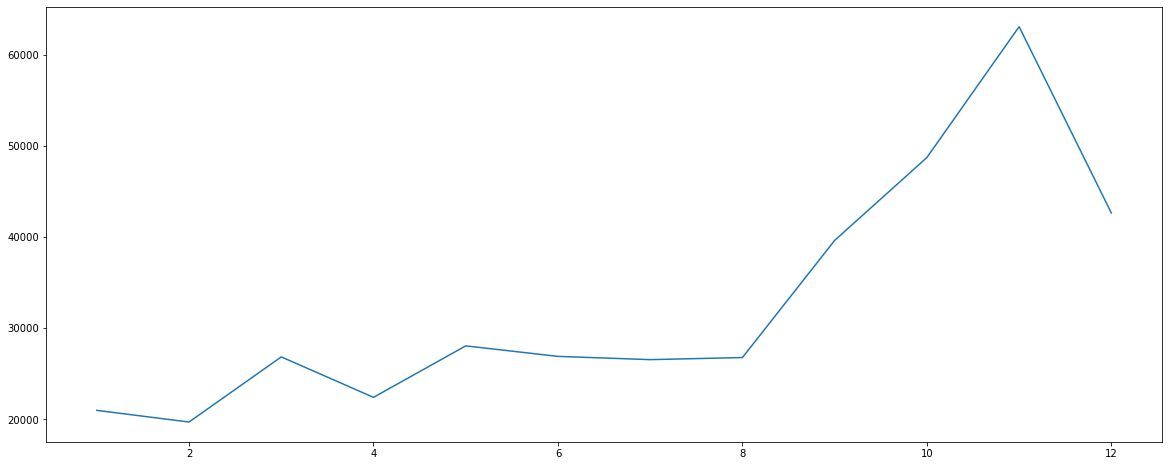

In [63]:
#time series transactions for Month 
active_transactions=df.groupby('Month')['InvoiceNo'].agg(np.size)
plt.figure(figsize=(20,8))
plt.plot(active_transactions)
plt.show()

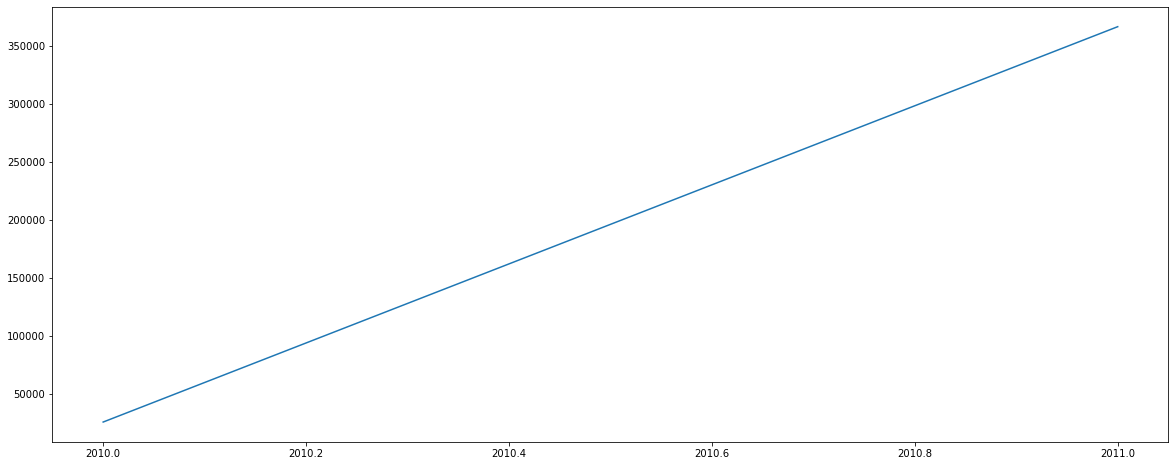

In [64]:
#time series transactions for Year 
active_transactions=df.groupby('Year')['InvoiceNo'].agg(np.size)
plt.figure(figsize=(20,8))
plt.plot(active_transactions)
plt.show()

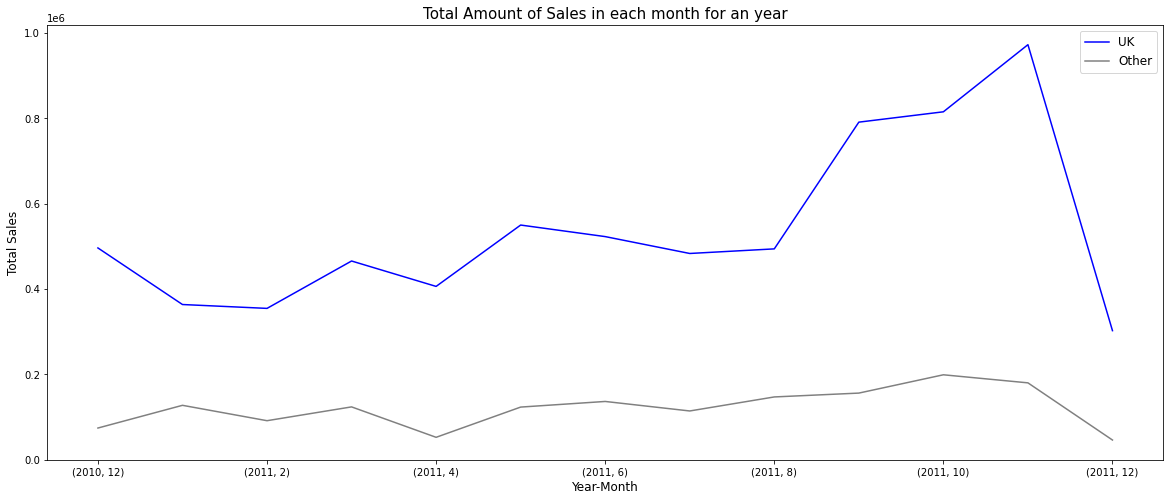

In [65]:
plt.figure(figsize=(20,8))
df[df['Country']=='United Kingdom'].groupby(['Year','Month'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['Year','Month'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Total Amount of Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

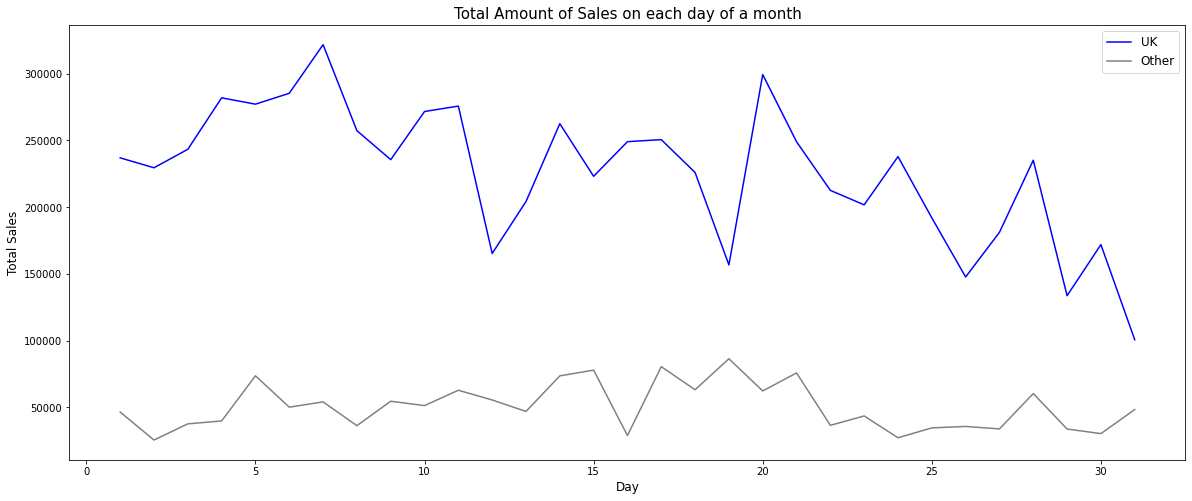

In [66]:
plt.figure(figsize=(20,8))
df[df['Country']=='United Kingdom'].groupby(['Day'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['Day'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Day',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Total Amount of Sales on each day of a month', size=15)
plt.legend(fontsize=12)
plt.show()

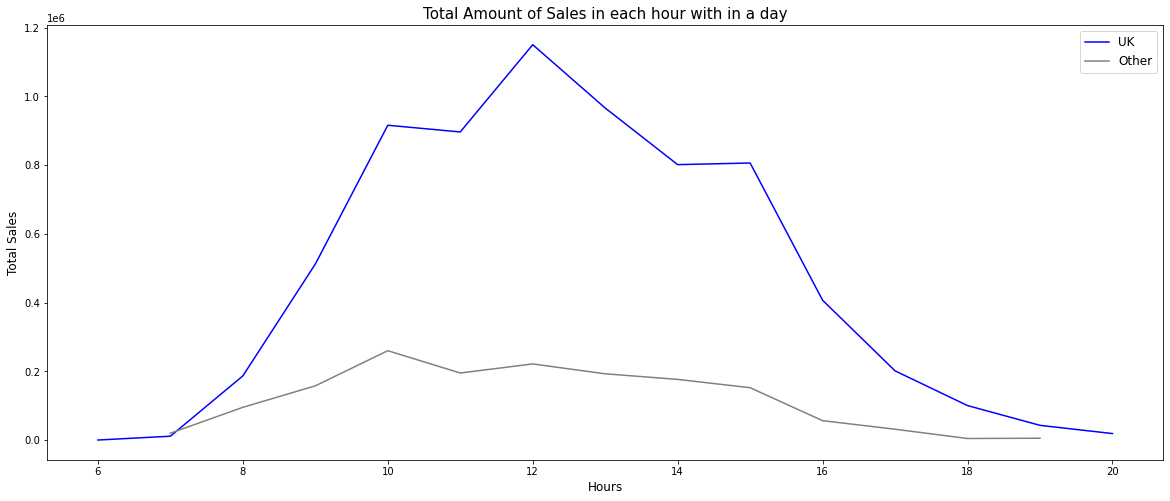

In [67]:
plt.figure(figsize=(20,8))
df[df['Country']=='United Kingdom'].groupby(['Hour'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['Hour'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Hours',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Total Amount of Sales in each hour with in a day', size=15)
plt.legend(fontsize=12)
plt.show()

#### Data Transformation:

 - Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts. 

- Create month cohorts and analyze active customers for each cohort.

- Analyze the retention rate of customers.

In [68]:
df_cohort = df.copy()
#selecting limited cols
df_cohort = df_cohort.iloc[:,:9]
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [69]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392351 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392351 non-null  object        
 1   StockCode    392351 non-null  object        
 2   Description  392351 non-null  object        
 3   Quantity     392351 non-null  int64         
 4   InvoiceDate  392351 non-null  datetime64[ns]
 5   UnitPrice    392351 non-null  float64       
 6   CustomerID   392351 non-null  float64       
 7   Country      392351 non-null  object        
 8   Amount       392351 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 29.9+ MB


In [70]:
#creating 1st variable InvoiceMonth
df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].dt.strftime('%Y-%m')

df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])

In [71]:
#creating 2nd variable CohortMonth

df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')

df_cohort['CohortMonth'] = pd.to_datetime(df_cohort['CohortMonth'])

In [72]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392351 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392351 non-null  object        
 1   StockCode     392351 non-null  object        
 2   Description   392351 non-null  object        
 3   Quantity      392351 non-null  int64         
 4   InvoiceDate   392351 non-null  datetime64[ns]
 5   UnitPrice     392351 non-null  float64       
 6   CustomerID    392351 non-null  float64       
 7   Country       392351 non-null  object        
 8   Amount        392351 non-null  float64       
 9   InvoiceMonth  392351 non-null  datetime64[ns]
 10  CohortMonth   392351 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(1), object(4)
memory usage: 35.9+ MB


In [73]:
#creating 3nd variable CohortPeriod

def diff_month(d1,d2):
    return((d1.dt.year - d2.dt.year)*12+d1.dt.month-d2.dt.month)

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'],df_cohort['CohortMonth'])


In [74]:
df_cohort.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceMonth,CohortMonth,CohortPeriod
144007,548715,84251C,"GREETING CARD, TWO SISTERS.",12,2011-04-03 15:22:00,0.19,17758.0,United Kingdom,2.28,2011-04-01,2011-04-01,0
119762,546580,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-03-15 11:09:00,0.42,14911.0,Others,10.50,2011-03-01,2010-12-01,3
462574,575982,22307,GOLD MUG BONE CHINA TREE OF LIFE,6,2011-11-13 13:42:00,1.06,13798.0,United Kingdom,6.36,2011-11-01,2010-12-01,11
152970,549718,23049,RECYCLED ACAPULCO MAT RED,2,2011-04-11 15:03:00,8.25,13846.0,United Kingdom,16.50,2011-04-01,2010-12-01,4
483822,577508,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-11-20 12:45:00,2.95,18127.0,United Kingdom,5.90,2011-11-01,2011-07-01,4
41177,539754,82600,NO SINGING METAL SIGN,1,2010-12-21 16:06:00,2.10,12748.0,United Kingdom,2.10,2010-12-01,2010-12-01,0
506800,579155,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,4,2011-11-28 13:37:00,1.25,18101.0,United Kingdom,5.00,2011-11-01,2011-07-01,4
464122,576078,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,18,2011-11-13 16:22:00,0.79,14432.0,United Kingdom,14.22,2011-11-01,2011-09-01,2
507232,579170,21172,PARTY METAL SIGN,4,2011-11-28 14:26:00,1.45,17811.0,United Kingdom,5.80,2011-11-01,2011-01-01,10
122071,546850,21382,SET/4 SPRING FLOWER DECORATION,1,2011-03-17 13:20:00,2.95,13268.0,United Kingdom,2.95,2011-03-01,2011-03-01,0


In [75]:
Customer_Cohort = df_cohort.pivot_table(index='CohortMonth',columns='CohortPeriod', values = 'CustomerID', aggfunc = 'nunique')

In [76]:
Customer_Cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,884.0,323.0,286.0,339.0,321.0,352.0,320.0,308.0,312.0,349.0,330.0,444.0,234.0
2011-01-01,415.0,91.0,111.0,96.0,132.0,120.0,103.0,100.0,124.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,109.0,103.0,94.0,97.0,104.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,67.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,63.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,80.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,187.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


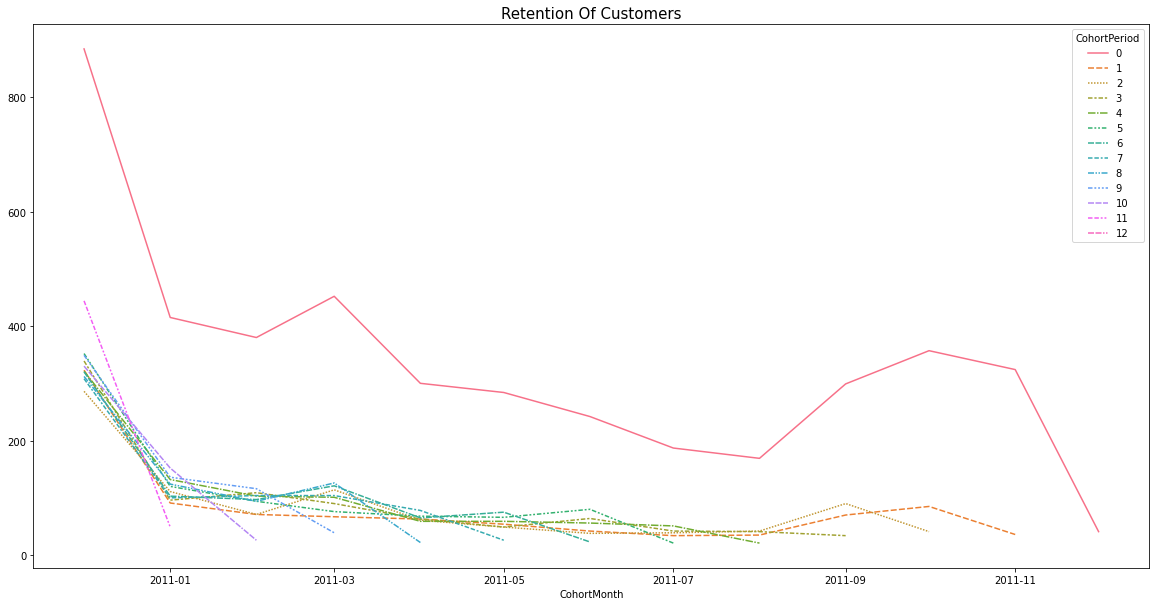

In [77]:
plt.figure(figsize=(20,10))
plt.title('Retention Of Customers', size=15)
sns.lineplot(data=Customer_Cohort);

In [78]:
# retention table

cohort_size = Customer_Cohort.iloc[:,0]
retention = Customer_Cohort.divide(cohort_size, axis=0)

retention.index = pd.to_datetime(retention.index).date
retention.round(3)*100

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
2010-12-01,100.0,36.5,32.4,38.3,36.3,39.8,36.2,34.8,35.3,39.5,37.3,50.2,26.5
2011-01-01,100.0,21.9,26.7,23.1,31.8,28.9,24.8,24.1,29.9,32.8,36.6,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.7,27.1,24.7,25.5,27.4,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,14.8,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.0,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.1,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.2,20.9,22.5,27.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,23.4,30.1,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


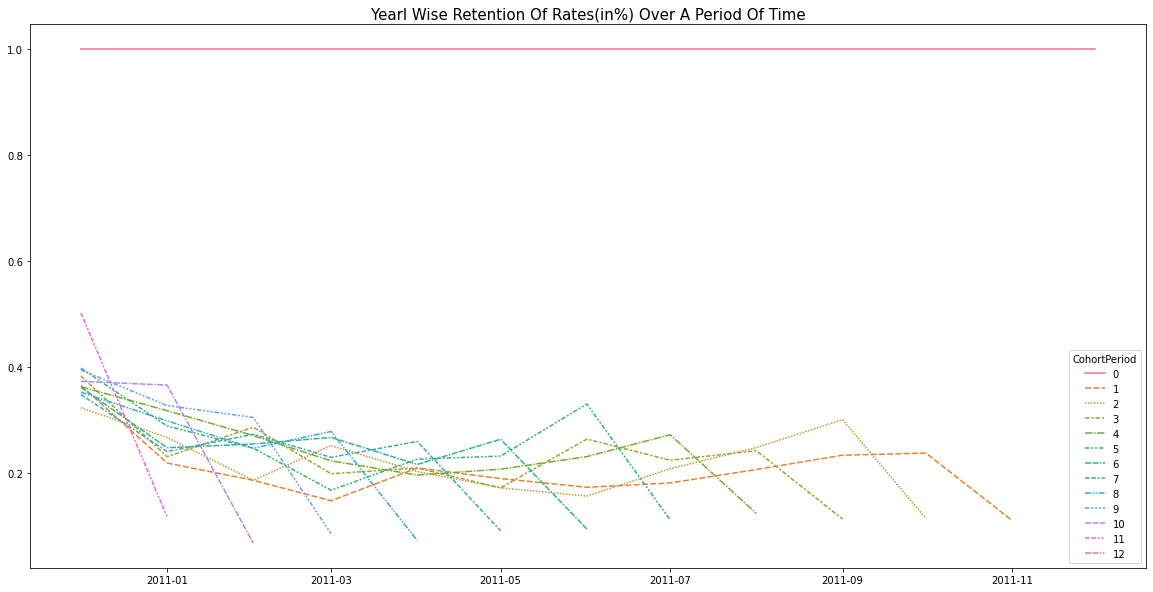

In [79]:
plt.figure(figsize=(20,10))
plt.title('Yearl Wise Retention Of Rates(in%) Over A Period Of Time', size=15)
sns.lineplot(data=retention);

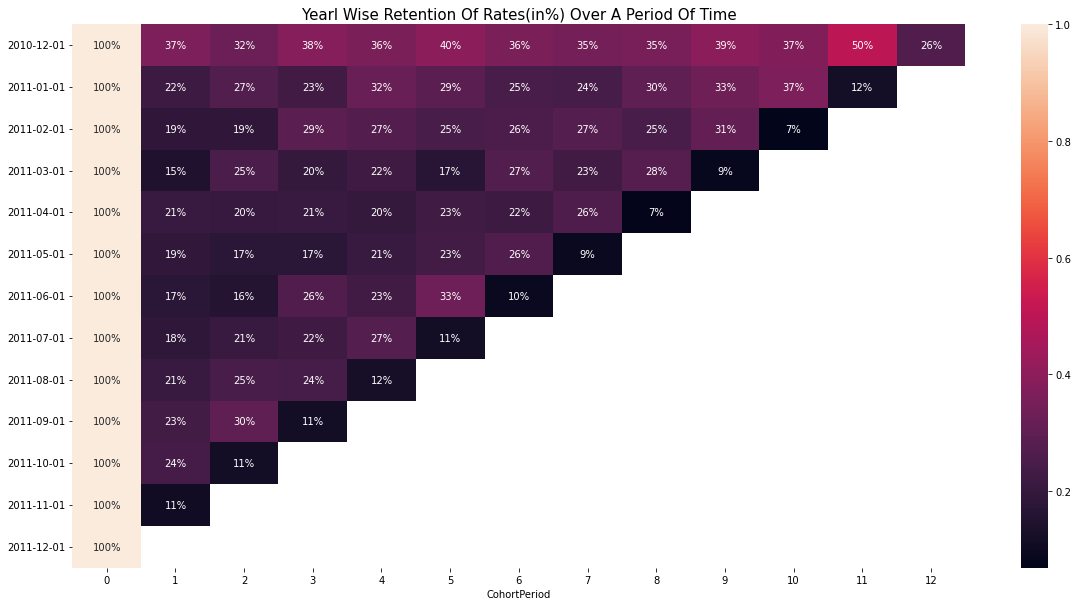

In [80]:
#periodical representation
plt.figure(figsize=(20,10))
plt.title('Yearl Wise Retention Of Rates(in%) Over A Period Of Time', size=15)
sns.heatmap(data=retention, annot=True, fmt='.0%')
plt.show()

In [81]:
amnt_Cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Amount', aggfunc='mean').round(2)
amnt_Cohort

#this table shows the average amount spent by the group of customers over a period of time.

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,22.23,27.28,26.87,26.90,21.16,28.14,28.29,27.40,28.99,33.44,33.73,23.56,25.8
2011-01-01,19.79,24.47,20.98,28.66,22.40,26.29,25.25,25.39,19.09,21.14,19.73,19.78,NaN
2011-02-01,18.00,20.30,20.49,19.49,17.69,16.97,22.33,22.61,18.80,22.19,23.50,NaN,NaN
2011-03-01,17.55,20.35,22.58,18.03,20.96,19.00,22.04,19.68,16.80,13.19,NaN,NaN,NaN
2011-04-01,16.89,20.85,19.50,18.74,19.55,15.00,15.25,15.97,12.34,NaN,NaN,NaN,NaN
2011-05-01,19.90,17.36,22.29,20.91,18.61,14.11,17.02,14.06,NaN,NaN,NaN,NaN,NaN
2011-06-01,24.00,16.31,19.95,20.46,15.35,16.32,13.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,14.88,23.53,11.80,13.03,10.90,11.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.52,13.16,12.53,15.89,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


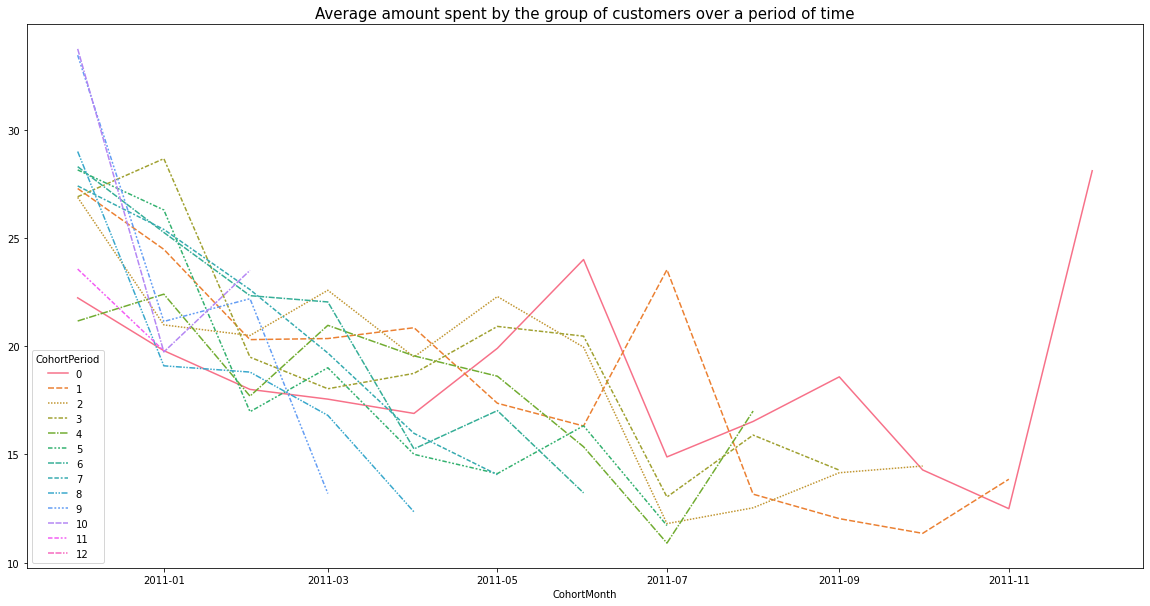

In [82]:
plt.figure(figsize=(20,10))
plt.title('Average amount spent by the group of customers over a period of time', size=15)
sns.lineplot(data=amnt_Cohort);

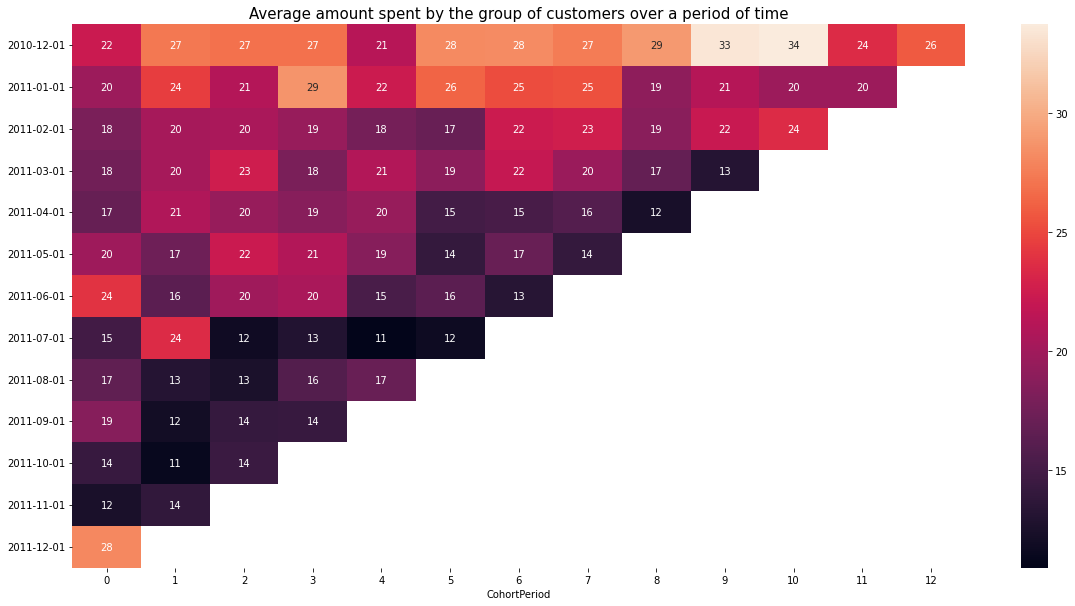

In [83]:
amnt_Cohort.index = pd.to_datetime(amnt_Cohort.index).date
plt.figure(figsize=(20, 10))
plt.title('Average amount spent by the group of customers over a period of time', size=15)
sns.heatmap(data = amnt_Cohort, annot = True)
plt.show()

#### Data Modeling :

Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

Calculate RFM metrics.

Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

Combine three ratings to get a RFM segment (as strings).

Get the RFM score by adding up the three ratings.

Analyze the RFM segments by summarizing them and comment on the findings.

Note: 

Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money.

In [84]:
R_F_M = df.copy()

R_F_M = R_F_M.iloc[:,:9]

R_F_M.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [85]:
Recency = pd.DataFrame(R_F_M.groupby('CustomerID')['InvoiceDate'].max().reset_index())

Recency['InvoiceDate'] = pd.to_datetime(Recency['InvoiceDate']).dt.date

Recency['MaxDate'] = (Recency['InvoiceDate'].max())

Recency['Recency'] = (Recency['MaxDate']-Recency['InvoiceDate']).dt.days + 1

Recency = Recency[['CustomerID','Recency']]

Recency.head()

,CustomerID,Recency
0,12347.0,3
1,12348.0,76
2,12349.0,19
3,12350.0,311
4,12352.0,37


In [86]:
Frequency = pd.DataFrame(R_F_M.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())

Frequency.columns = ['FreqCustomerID','Frequency']

Frequency.head()

,FreqCustomerID,Frequency
0,12347.0,7
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,7


In [87]:
Monetary = pd.DataFrame(R_F_M.groupby('CustomerID')['Amount'].sum().reset_index())

Monetary.columns = ['MCustomerID','Monetary']

Monetary.head()

,MCustomerID,Monetary
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,1665.74


In [88]:
R_F_M = pd.concat([Recency,Frequency,Monetary], axis=1)

R_F_M.drop(['FreqCustomerID','MCustomerID'], axis=1,inplace=True)

R_F_M.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,7,1665.74
5,12353.0,205,1,89.00
6,12354.0,233,1,1079.40
7,12355.0,215,1,459.40
8,12356.0,23,3,2811.43
9,12357.0,34,1,6207.67


Note:

Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money.

In [89]:
R_F_M['Recency_Score'] = pd.cut(R_F_M['Recency'],bins=[0,18,51,143,264,375],labels=[5,4,3,2,1])

R_F_M['Recency_Score'] = R_F_M['Recency_Score'].astype('int')

R_F_M['Frequency_Score'] = pd.cut(R_F_M['Frequency'],bins=[0,1,2,5,9,210],labels=[1,2,3,4,5])

R_F_M['Frequency_Score'] = R_F_M['Frequency_Score'].astype('int')

R_F_M['Monetary_Score'] = pd.cut(R_F_M['Monetary'],bins=[-1,306,667,1650,3614,290000],labels=[1,2,3,4,5])

R_F_M['Monetary_Score'] = R_F_M['Monetary_Score'].astype('int')

In [90]:
R_F_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4334 non-null   float64
 1   Recency          4334 non-null   int64  
 2   Frequency        4334 non-null   int64  
 3   Monetary         4334 non-null   float64
 4   Recency_Score    4334 non-null   int64  
 5   Frequency_Score  4334 non-null   int64  
 6   Monetary_Score   4334 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 237.1 KB


In [91]:
R_F_M.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,12347.0,3,7,4310.00,5,4,5
1,12348.0,76,4,1797.24,3,3,4
2,12349.0,19,1,1757.55,4,1,4
3,12350.0,311,1,334.40,1,1,2
4,12352.0,37,7,1665.74,4,4,4


In [92]:
R_F_M['TScore'] = R_F_M.Frequency_Score + R_F_M.Monetary_Score + R_F_M.Recency_Score

In [93]:
R_F_M.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,TScore
0,12347.0,3,7,4310.00,5,4,5,14
1,12348.0,76,4,1797.24,3,3,4,10
2,12349.0,19,1,1757.55,4,1,4,9
3,12350.0,311,1,334.40,1,1,2,4
4,12352.0,37,7,1665.74,4,4,4,12


In [94]:
R_F_M.TScore.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    4334.000000
mean        8.413013
std         3.309021
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
90%        13.000000
95%        15.000000
99%        15.000000
max        15.000000
Name: TScore, dtype: float64

In [95]:
R_F_M['Customer_Type'] = pd.cut(R_F_M['TScore'],bins=[0,6,8,11,13,16], labels=['Bad','Bronze','Silver','Gold','Platinum'])

In [96]:
R_F_M.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,TScore,Customer_Type
0,12347.0,3,7,4310.00,5,4,5,14,Platinum
1,12348.0,76,4,1797.24,3,3,4,10,Silver
2,12349.0,19,1,1757.55,4,1,4,9,Silver
3,12350.0,311,1,334.40,1,1,2,4,Bad
4,12352.0,37,7,1665.74,4,4,4,12,Gold


In [97]:
round(R_F_M.Customer_Type.value_counts(normalize=True)*100,0)

Bad         33.0
Silver      28.0
Bronze      20.0
Gold        10.0
Platinum     9.0
Name: Customer_Type, dtype: float64

In [98]:
R_F_M.groupby('Customer_Type')['Recency','Frequency','Monetary'].mean().round(0) #RFM value for each categroy

,Recency,Frequency,Monetary
Customer_Type,,,
Bad,188.0,1.0,297.0
Bronze,78.0,2.0,621.0
Silver,44.0,4.0,1416.0
Gold,20.0,7.0,2863.0
Platinum,10.0,19.0,12111.0


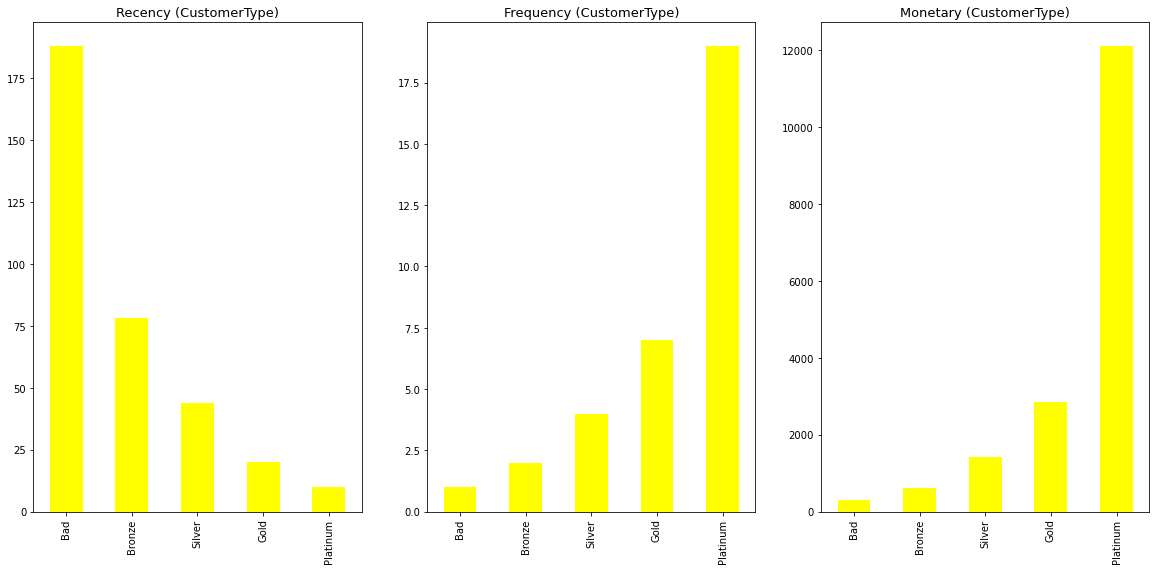

In [99]:
column = ['Recency','Frequency','Monetary']
plt.figure(figsize=(20,9))

for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    R_F_M.groupby('Customer_Type')[j].mean().round(0).plot(kind='bar',color = 'yellow')
    plt.title('{} (CustomerType)'.format(j),size=13)
    plt.xlabel('')

plt.show()

### Data Modeling :

Create clusters using k-means clustering algorithm.

Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

Decide the optimum number of clusters to be formed.

Analyze these clusters and comment on the results.

In [100]:
kmeans_df = R_F_M.copy()

kmeans_df = kmeans_df.iloc[:,:4]
kmeans_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,7,1665.74


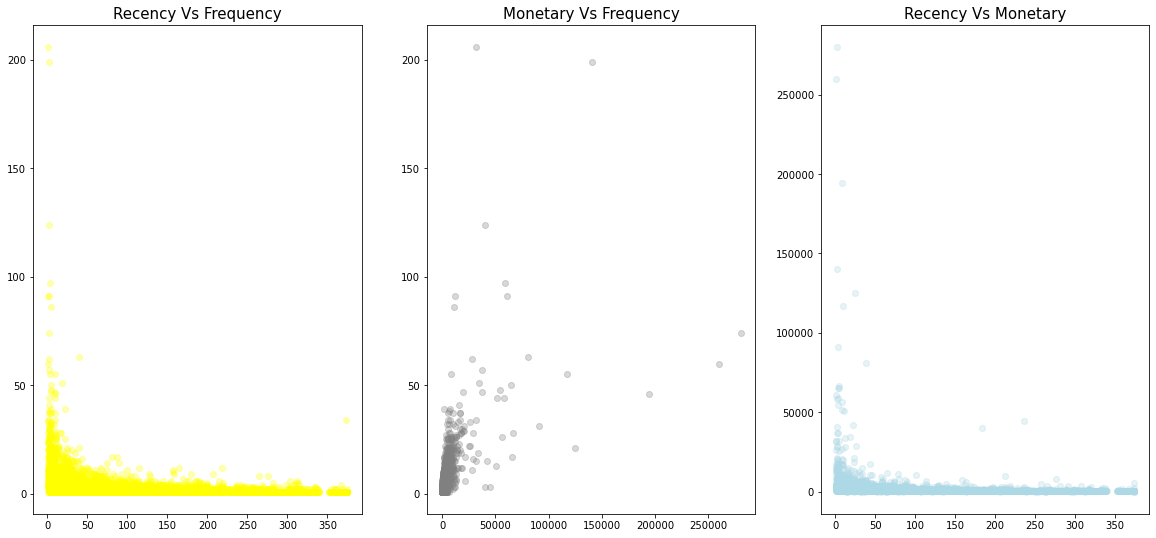

In [101]:
plt.figure(figsize=(20,9))

plt.subplot(1,3,1)
plt.scatter(kmeans_df.Recency, kmeans_df.Frequency, color = 'yellow', alpha=0.3)
plt.title('Recency Vs Frequency', size=15)

plt.subplot(1,3,2)
plt.scatter(kmeans_df.Monetary, kmeans_df.Frequency, color = 'grey', alpha=0.3)
plt.title('Monetary Vs Frequency', size=15)

plt.subplot(1,3,3)
plt.scatter(kmeans_df.Recency, kmeans_df.Monetary, color = 'lightblue', alpha=0.3)
plt.title('Recency Vs Monetary', size=15)

plt.show()

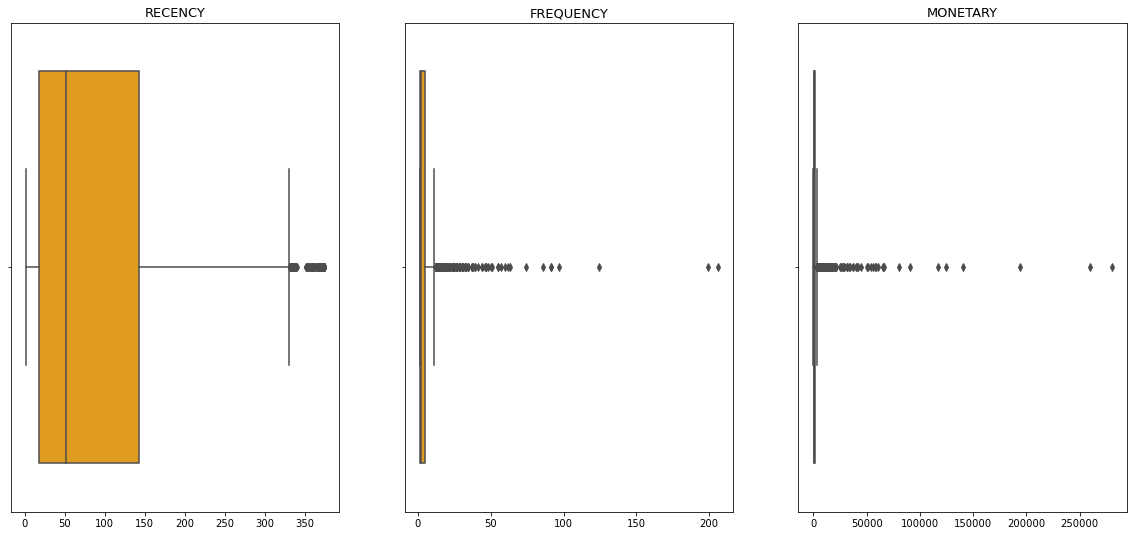

In [102]:
#distribution of variables

column = ['Recency','Frequency','Monetary']

plt.figure(figsize=(20,9))

for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(kmeans_df[j], color='orange')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()),size=13)
    
plt.show()

In [103]:
#Treating Outliers
# For Monetary
Q1 = kmeans_df.Monetary.quantile(0.05)

Q3 = kmeans_df.Monetary.quantile(0.95)

IQR = Q3 - Q1

kmeans_df = kmeans_df[(kmeans_df.Monetary >= Q1 - 1.5 * IQR) & (kmeans_df.Monetary <= Q3 + 1.5*IQR)]

In [104]:
# For Monetary
Q1 = kmeans_df.Recency.quantile(0.05)

Q3 = kmeans_df.Recency.quantile(0.95)

IQR = Q3 - Q1

kmeans_df = kmeans_df[(kmeans_df.Recency >= Q1 - 1.5 * IQR) & (kmeans_df.Recency <= Q3 + 1.5*IQR)]

In [105]:
# For Monetary
Q1 = kmeans_df.Frequency.quantile(0.05)

Q3 = kmeans_df.Frequency.quantile(0.95)

IQR = Q3 - Q1

kmeans_df = kmeans_df[(kmeans_df.Frequency >= Q1 - 1.5 * IQR) & (kmeans_df.Frequency <= Q3 + 1.5*IQR)]

In [106]:
kmeans_df = kmeans_df.reset_index(drop=True)
kmeans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4259 entries, 0 to 4258
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4259 non-null   float64
 1   Recency     4259 non-null   int64  
 2   Frequency   4259 non-null   int64  
 3   Monetary    4259 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 133.2 KB


In [107]:
kmeans_df.sample(5)

,CustomerID,Recency,Frequency,Monetary
2250,15471.0,3,1,454.48
3360,17015.0,29,3,1838.61
2431,15716.0,146,4,1101.11
4210,18221.0,23,5,1041.61
2935,16425.0,303,1,302.70


In [108]:
kmeans_df = kmeans_df.iloc[:,1:]

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
SC = StandardScaler()

In [111]:
kmeans_df_norm = SC.fit_transform(kmeans_df)

In [112]:
kmeans_df_norm = pd.DataFrame(kmeans_df_norm)
kmeans_df_norm.columns = ['Recency','Frequency','Monetary']
kmeans_df_norm.head()

,Recency,Frequency,Monetary
0,-0.912760,0.877595,1.680623
1,-0.184490,0.098534,0.272852
2,-0.753139,-0.680528,0.250616
3,2.159940,-0.680528,-0.546702
4,-0.573566,0.877595,0.199179


In [113]:
from sklearn.cluster import KMeans

In [114]:
Kmeans = KMeans(n_clusters=5)
Kmeans.fit(kmeans_df_norm)

KMeans(n_clusters=5)

In [115]:
Kmeans.labels_

array([4, 0, 3, ..., 3, 4, 0], dtype=int32)

In [116]:
Kmeans.cluster_centers_

array([[-0.60259196,  0.50101857,  0.3960702 ],
       [ 1.59606641, -0.55700248, -0.49063499],
       [-0.79919799,  3.66619854,  4.18212942],
       [-0.39766469, -0.42333904, -0.41262776],
       [-0.70422941,  1.85985342,  1.68866528]])

In [117]:
print (Kmeans.labels_)
print (len(Kmeans.labels_))

[4 0 3 ... 3 4 0]
4259


In [118]:
print (type(Kmeans.labels_))
unique, counts = np.unique(Kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 862, 1: 1007, 2: 107, 3: 1975, 4: 308}


In [119]:
kmeans_df['clusters'] = Kmeans.labels_
kmeans_df.head()

,Recency,Frequency,Monetary,clusters
0,3,7,4310.00,4
1,76,4,1797.24,0
2,19,1,1757.55,3
3,311,1,334.40,1
4,37,7,1665.74,0


In [120]:
kmeans_df.groupby('clusters').mean().round(0)

,Recency,Frequency,Monetary
clusters,,,
0,34.0,6.0,2017.0
1,254.0,1.0,434.0
2,14.0,18.0,8775.0
3,55.0,2.0,574.0
4,24.0,11.0,4324.0


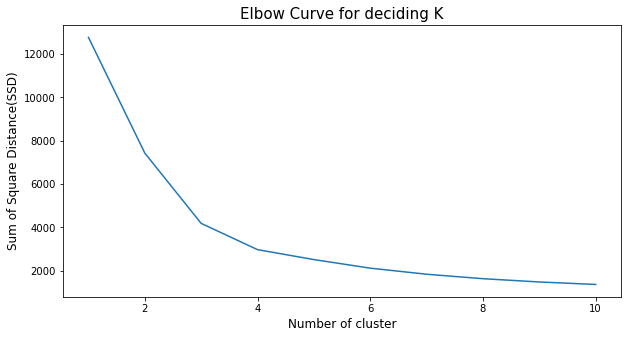

In [121]:
# Elbow-curve/SSD

ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(kmeans_df_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

In [122]:
from sklearn.metrics import silhouette_samples, silhouette_score


for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(kmeans_df_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(kmeans_df_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5460929706945657
For n_clusters=3, the silhouette score is 0.5105004334604668
For n_clusters=4, the silhouette score is 0.4865715970728021
For n_clusters=5, the silhouette score is 0.44185916176884094
For n_clusters=6, the silhouette score is 0.4169656865593138
For n_clusters=7, the silhouette score is 0.41751507836186597
For n_clusters=8, the silhouette score is 0.38667007992559166
For n_clusters=9, the silhouette score is 0.39012889737040457
For n_clusters=10, the silhouette score is 0.38224842379456425


In [123]:
# Kmeans with K=3
Kmeans = KMeans(n_clusters = 2)
Kmeans.fit(kmeans_df_norm)

KMeans(n_clusters=2)

In [124]:
kmeans_df['clusters'] = Kmeans.labels_
kmeans_df.head()

,Recency,Frequency,Monetary,clusters
0,3,7,4310.00,1
1,76,4,1797.24,0
2,19,1,1757.55,0
3,311,1,334.40,0
4,37,7,1665.74,0


In [125]:
kmeans_df.groupby('clusters').mean().round(0)

,Recency,Frequency,Monetary
clusters,,,
0,106.0,2.0,758.0
1,23.0,11.0,4614.0


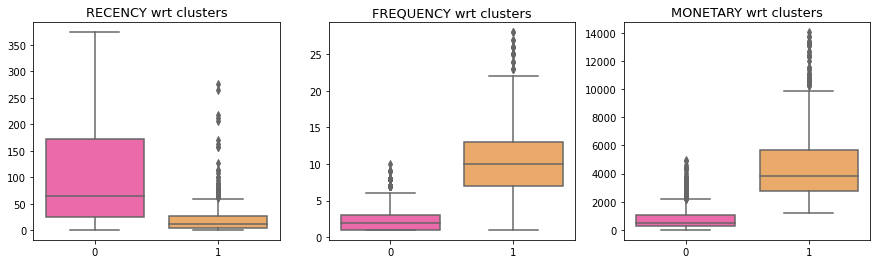

In [126]:
column = ['Recency','Frequency','Monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=kmeans_df[j], x=kmeans_df['clusters'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

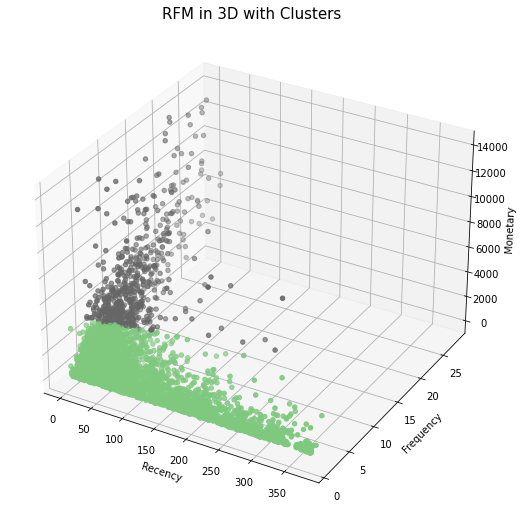

In [127]:
# Creating figure
fig = plt.figure(figsize = (20, 9))
ax = plt.axes(projection ="3d")



# Creating plot
ax.scatter3D(kmeans_df.Recency, kmeans_df.Frequency, kmeans_df.Monetary, c=kmeans_df.clusters, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()


#### Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

- Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

- Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

- Bar graph to show the count of orders vs. hours throughout the day

- Plot the distribution of RFM values using histogram and frequency charts

- Plot error (cost) vs. number of clusters selected

- Visualize to compare the RFM values of the clusters using heatmap

In [129]:
df.to_excel('df_.xlsx')

In [134]:
R_F_M.to_excel('R_F_M.xlsx')

In [135]:
kmeans_df_norm.to_excel('kmeans_df_norm.xlsx')

In [139]:
kmeans_df.to_excel('kmeans_df.xlsx')

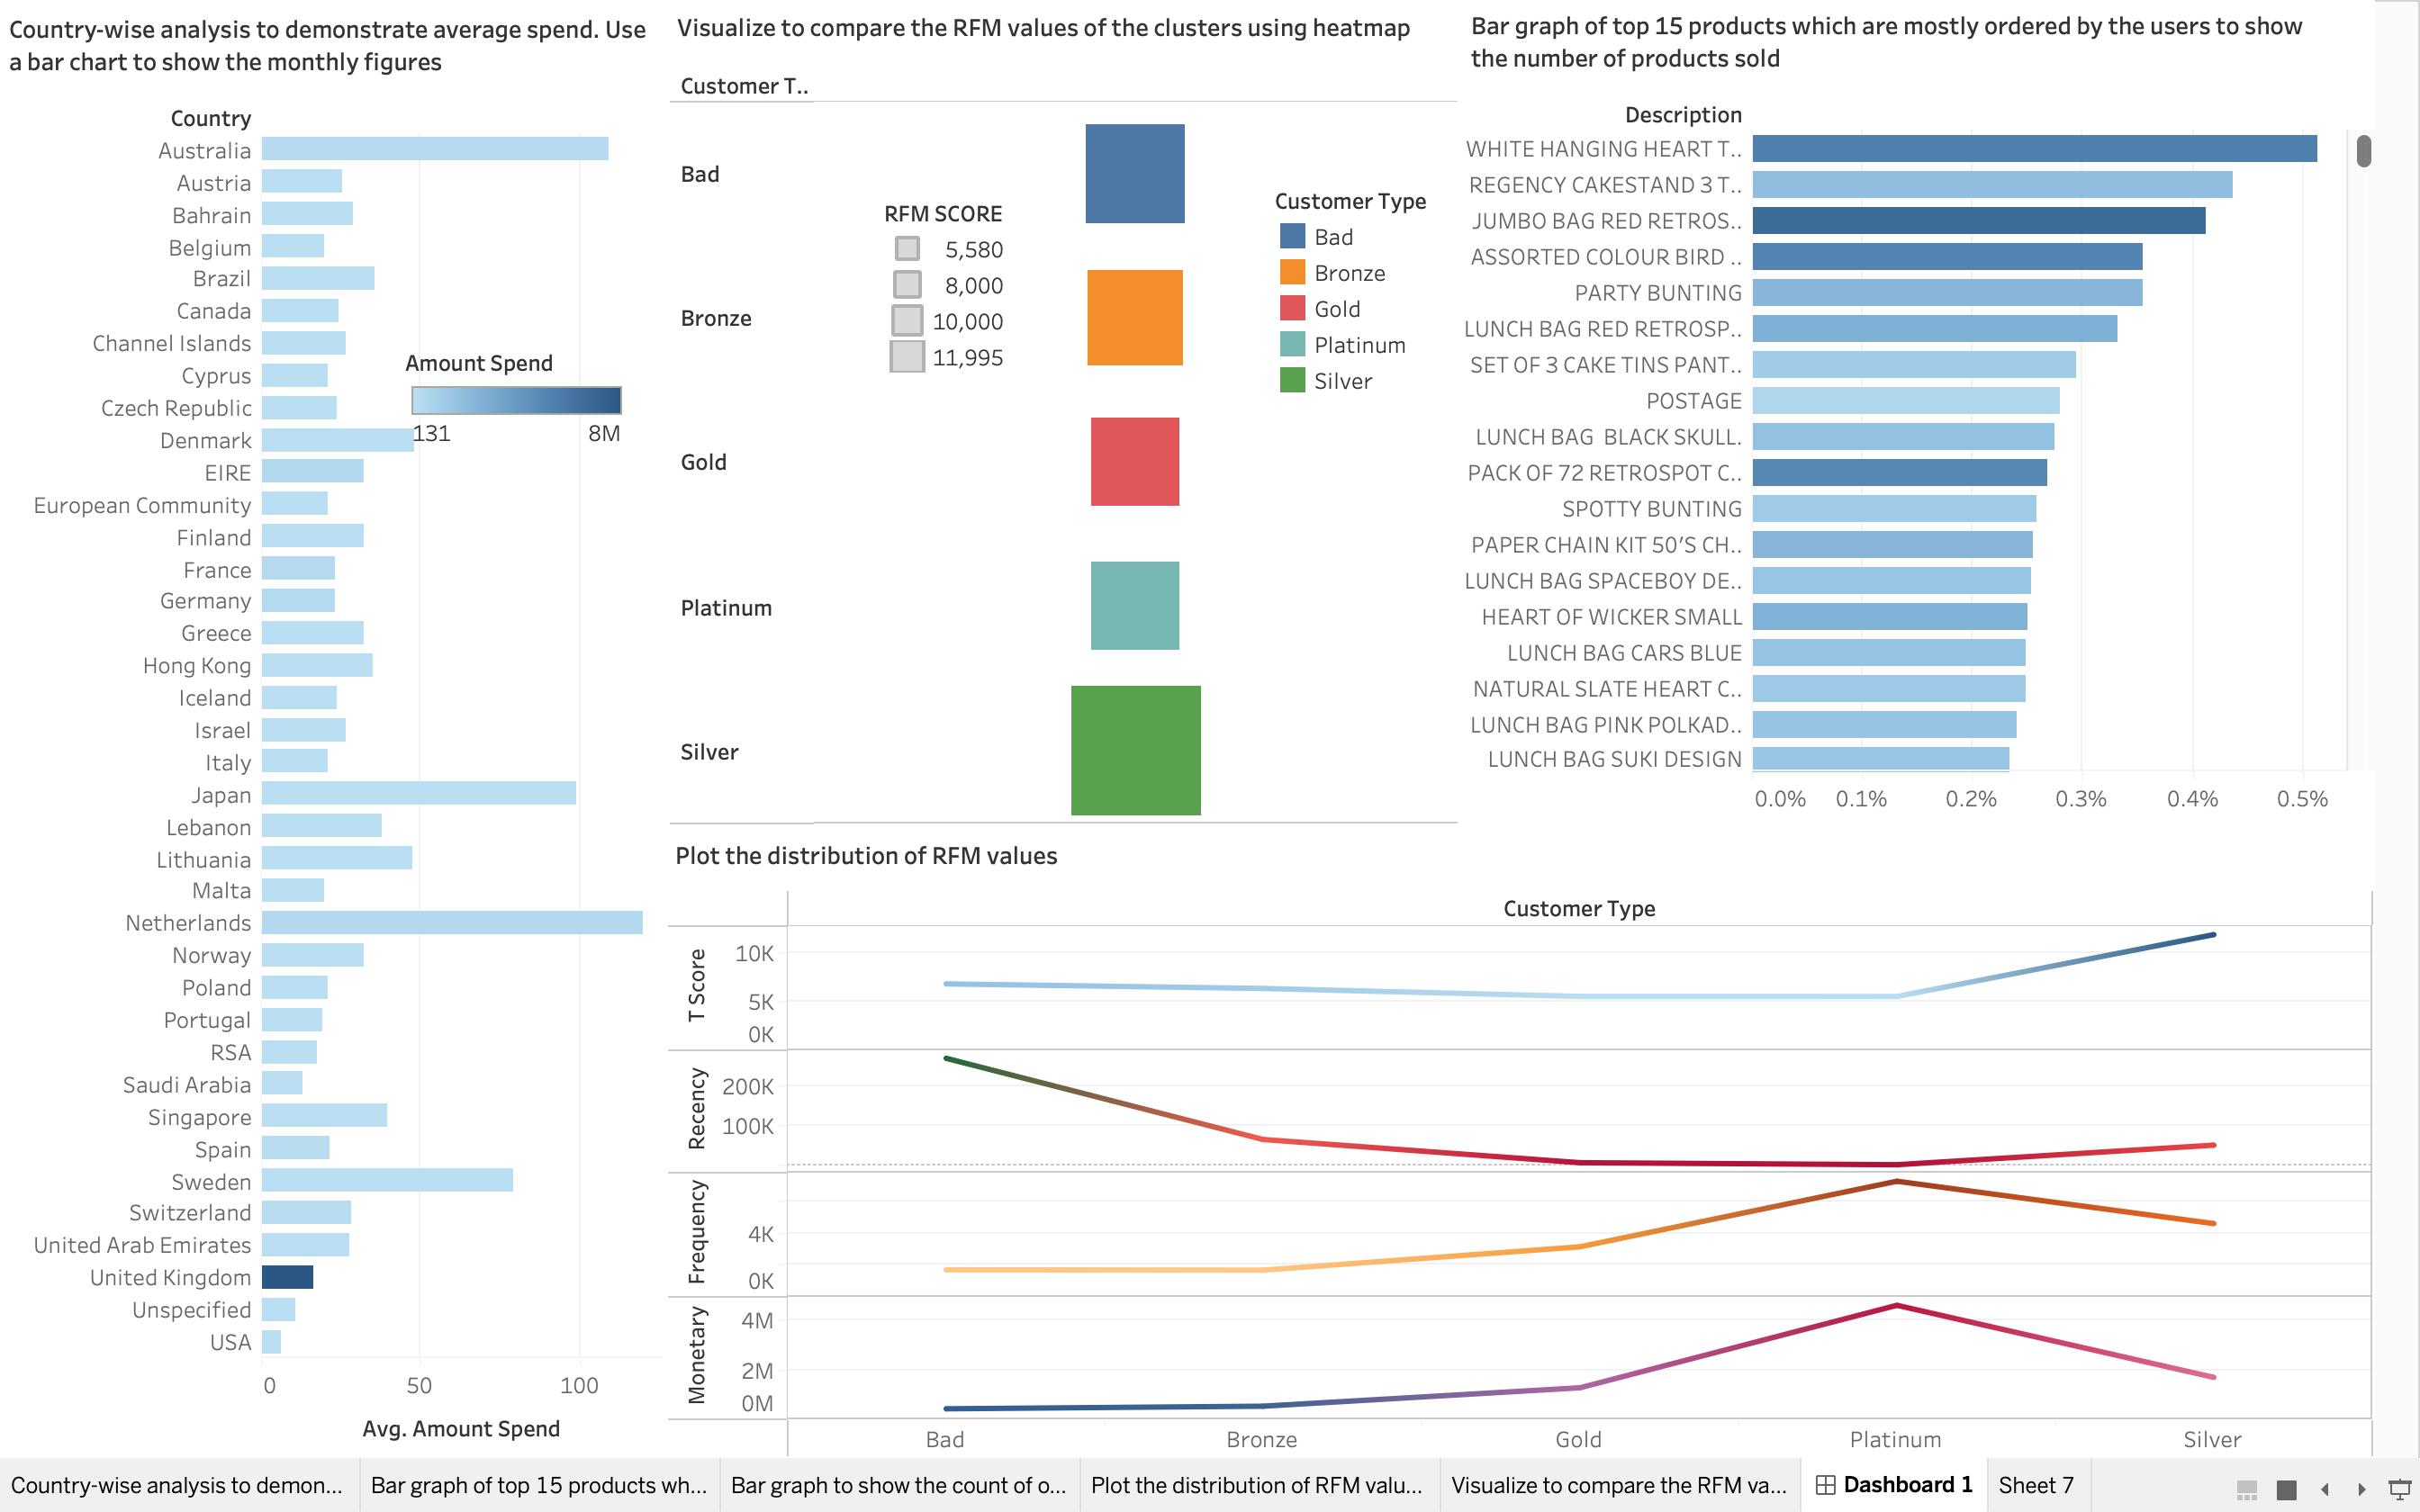

#### https://public.tableau.com/app/profile/rushikesh.khankar/viz/RetailCohortRFMAnalysis/Dashboard1?publish=yes

#### Thank You 